In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib widget

# Plotting format for thesis
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16, labelsize=16)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=18)

Fit parameters: a = 1.0000050040455755, b = 0.42994620933320615


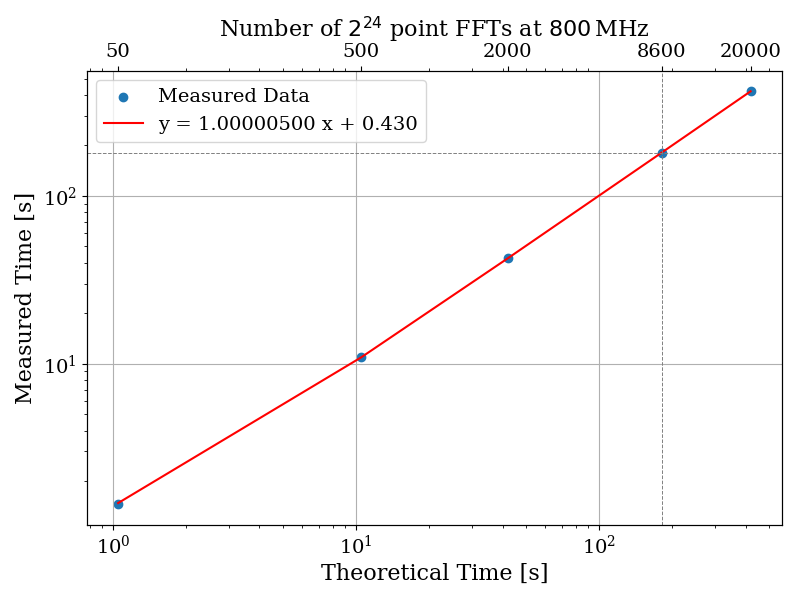

In [6]:
# Data taken randomly on may 16 2024. 800MHz sample rate 2^24pt
theoryTime = [1.0486, 10.485, 41.943, 180.3551, 419.4304]
measuredTime = [1.4616, 10.936, 42.3741,180.7782, 419.8652]


# Define a linear function for fitting
def linear_fit(x, a, b):
    return a * x + b

# Perform the curve fit
params, params_covariance = curve_fit(linear_fit, theoryTime, measuredTime)

# Print fit parameters
print(f"Fit parameters: a = {params[0]}, b = {params[1]}")

# Generate data for the fit line
fit_line = linear_fit(np.array(theoryTime), *params)

# Calculate number of FFTs
sample_rate = 800e6
fft_points = 2**24
fft_time = fft_points / sample_rate
num_ffts = [time / fft_time for time in theoryTime]

# Plot data and fit

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.scatter(theoryTime, measuredTime, label='Measured Data')
ax1.plot(theoryTime, fit_line, label=f'y = {params[0]:.8f} x + {params[1]:.3f}', color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Theoretical Time [s]')
ax1.set_ylabel('Measured Time [s]')
ax1.legend()
ax1.grid()


# Add a second x-axis
ax2 = ax1.twiny()
ax2.set_xscale('log')
ax2.set_xlim(ax1.get_xlim())
ax2.set_xlabel(r'Number of $2^{24}$ point FFTs at $800\,$MHz')
ax2.set_xticks(theoryTime)
ax2.set_xticklabels([f'{n:.0f}' for n in num_ffts])

plt.tight_layout()

# Highlight the 4th data point
index = 3
ax1.axvline(x=theoryTime[index], color='gray', linestyle='--', linewidth=0.7)
ax1.axhline(y=measuredTime[index], color='gray', linestyle='--', linewidth=0.7)


plt.show()



Text(-15.777777777777784, 0.5, 'Noise Temp of Cascaded System [K]')

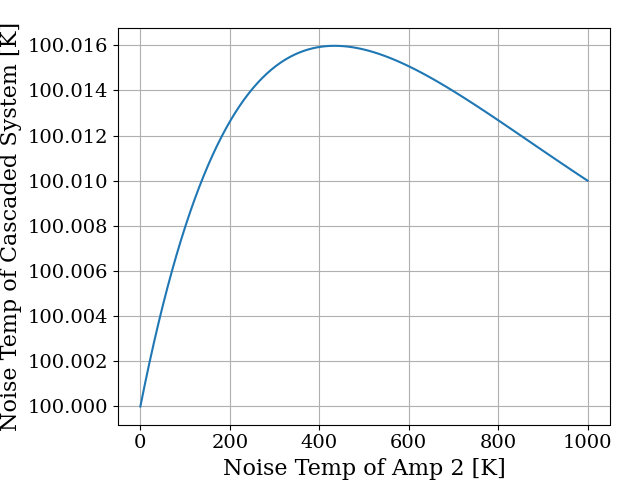

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#Friis plot
G1 = np.linspace(40,50,100) #dB
G1 = 10**(G1/10)
T1 = 100 #K
T2 = np.linspace(0, 1000, 100) #K

def tempToF(T,T0 = 290):
    return 1+(T/T0)

def friis(G1, F1, F2):
    F1 = tempToF(T1)
    F2 = tempToF(T2)
    return F1 + ((F2-1)/G1)

def fToTemp(F, T0 = 290):
    return((F-1)*T0)

plt.close('all')
plt.figure()
plt.plot(T2, fToTemp(friis(G1, T1, T2)))
plt.grid()
plt.tight_layout(pad = 2)
plt.xlabel('Noise Temp of Amp 2 [K]')
plt.ylabel('Noise Temp of Cascaded System [K]')



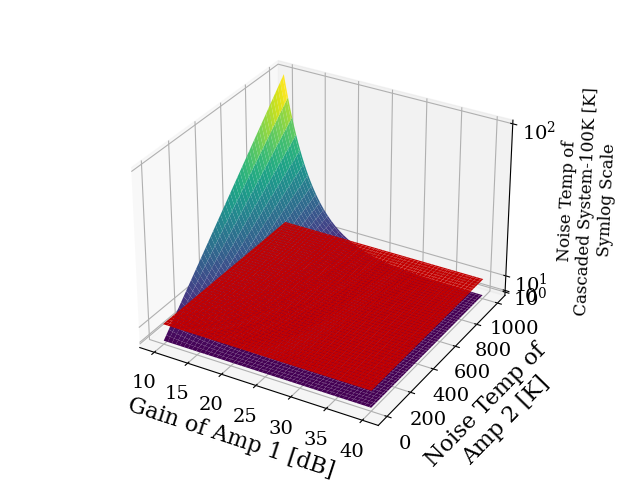

In [81]:
# Define parameters
G1 = np.linspace(10, 40, 100) # Gain in dB
T1 = 100 # K
T2 = np.linspace(0, 1000, 100) # Noise temperature in K

# Convert gain from dB to linear scale
G1_linear = 10**(G1/10)

# Create meshgrid for G1 and T2
G1_grid, T2_grid = np.meshgrid(G1_linear, T2)

# Define functions
def tempToF(T, T0=290):
    return 1 + (T / T0)

def friis(G1, T1, T2):
    F1 = tempToF(T1)
    F2 = tempToF(T2)
    return F1 + ((F2 - 1) / G1)

def fToTemp(F, T0=290):
    return (F - 1) * T0

# Calculate Friis noise temperature
friis_temp = fToTemp(friis(G1_grid, T1, T2_grid))-100

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(10*np.log10(G1_grid), T2_grid, friis_temp, cmap='viridis')
ax.plot_surface(10*np.log10(G1_grid), T2_grid, np.full_like(G1_grid,fill_value=10), color='r', alpha=1)
#ax.plot_wireframe(10*np.log10(G1_grid), T2_grid, np.ones_like(friis_temp), color='r', linestyle='--', alpha=1)



# Labels and title
ax.set_xlabel('Gain of Amp 1 [dB]', labelpad = 6)
ax.set_ylabel('Noise Temp of \nAmp 2 [K]', labelpad = 14)
ax.set_zlabel('Noise Temp of \nCascaded System-100K [K] \nSymlog Scale', labelpad = 14, fontsize = 12)
ax.set_zscale('symlog')
plt.tight_layout(pad=2)
plt.grid()

plt.show()

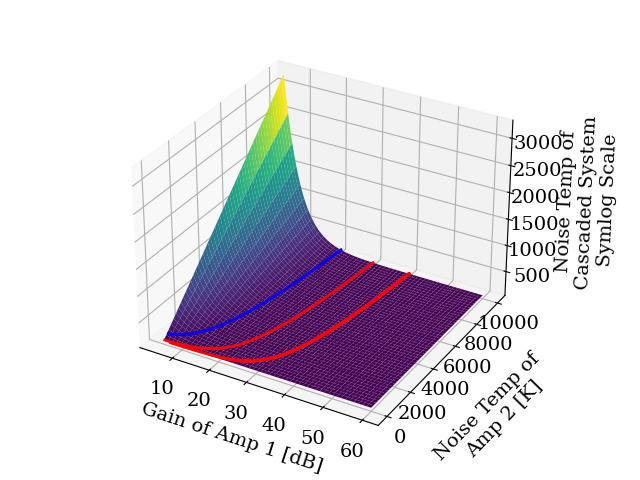

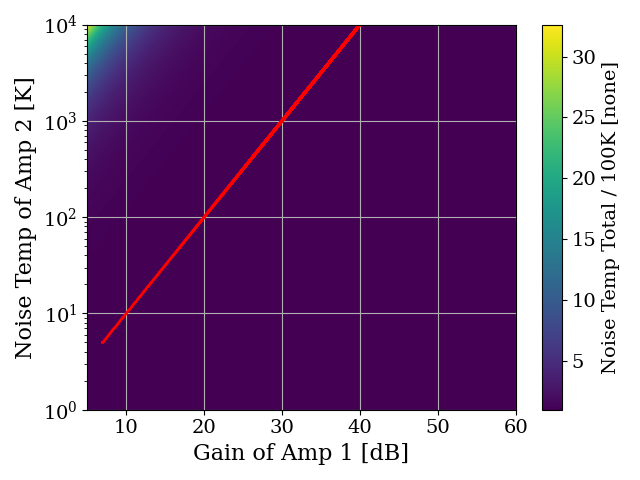

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm


# Define parameters
G1 = np.linspace(5, 60, 5000)  # Gain in dB
T1 = 100  # K
T2 = np.linspace(1, 10000, 5000)  # Noise temperature in K

# Convert gain from dB to linear scale
G1_linear = 10**(G1/10)

# Create meshgrid for G1 and T2
G1_grid, T2_grid = np.meshgrid(G1_linear, T2)

# Define functions
def tempToF(T, T0=290):
    return 1 + (T / T0)

def friis(G1, T1, T2):
    F1 = tempToF(T1)
    F2 = tempToF(T2)
    return F1 + ((F2 - 1) / G1)

def fToTemp(F, T0=290):
    return (F - 1) * T0

# Calculate Friis noise temperature
friis_temp = fToTemp(friis(G1_grid, T1, T2_grid)) - 0

# Plotting
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(10*np.log10(G1_grid), T2_grid, friis_temp, cmap='viridis')
#ax.plot_surface(10*np.log10(G1_grid), T2_grid, np.full_like(G1_grid, fill_value=10), color='r', alpha=0.5)
'''
# Find intersection points and plot
G1_log = 10 * np.log10(G1_grid)
intersection_indices = np.abs(friis_temp - 1) < 1e-2

G1_intersection = G1_log[intersection_indices]
T2_intersection = T2_grid[intersection_indices]
z_intersection = friis_temp[intersection_indices]
'''

G1_log = 10 * np.log10(G1_grid)

# Find and plot intersections at 1, 10, and 100
colors = ['r', 'r', 'b']  # Define colors for each intersection value
intersection_values = [101, 110, 180]

for value, color in zip(intersection_values, colors):
    intersection_indices = np.abs(friis_temp - value) < 1e-2
    G1_intersection = G1_log[intersection_indices]
    T2_intersection = T2_grid[intersection_indices]
    z_intersection = friis_temp[intersection_indices]
    ax.plot(G1_intersection, T2_intersection, z_intersection, color+'-', linewidth=2, zorder=100, label=f'Intersection at {value}')



ax.plot(G1_intersection, T2_intersection, z_intersection, 'k-', linewidth=2, zorder = -100)

# Labels and title
ax.set_xlabel('Gain of Amp 1 [dB]', labelpad=6, fontsize=14)
ax.set_ylabel('Noise Temp of \nAmp 2 [K]', labelpad=14, fontsize=14)
ax.set_zlabel('Noise Temp of \nCascaded System \nSymlog Scale', labelpad=14, fontsize=14)
ax.yaxis.set_tick_params(pad = 0)
#ax.set_zscale('symlog')
#ax.legend(loc ='upper right', fontsize = 12)
plt.tight_layout(pad=2)
plt.grid()

plt.show()

# Additional 2D histogram plot
fig2, ax2 = plt.subplots()

# Plot 2D histogram
hist = ax2.hist2d(10*np.log10(G1_grid.flatten()), T2_grid.flatten(), bins=50, cmin=1, cmap='viridis')

# Overlay the noise temperature as a color mesh
#mesh = ax2.pcolormesh(10*np.log10(G1_grid), T2_grid, friis_temp, shading='auto', cmap='viridis')
mesh = ax2.pcolormesh(10*np.log10(G1_grid), (T2_grid), friis_temp/T1, shading='auto', cmap='viridis')

cbar = plt.colorbar(mesh, ax=ax2, )
cbar.set_label('Noise Temp Total / 100K [none]', fontsize = 14)


# Add a curve where the noise temp is approximately 101K
tempCurve = 101
approx_101_indices = (friis_temp > tempCurve-0.01) & (friis_temp < tempCurve+0.01)
#approx_101_indices = (friis_temp < tempCurve-0.01) 
G1_approx_101 = 10 * np.log10(G1_grid[approx_101_indices])
T2_approx_101 = T2_grid[approx_101_indices]

ax2.plot(G1_approx_101, T2_approx_101, 'r-', linewidth=2, alpha = 1)


# Labels and title
ax2.set_xlabel('Gain of Amp 1 [dB]')
ax2.set_ylabel('Noise Temp of Amp 2 [K]')
ax2.set_yscale('log')
ax2.grid()

plt.tight_layout()
plt.show()




In [227]:
#this is really in system design section
from scipy.interpolate import interp1d

# Load data from the text file
filename = './comPowerAF10m.txt'
data_from_file = np.loadtxt(filename, delimiter=',')
AF_freqs = data_from_file[:, 0]
AF = data_from_file[:, 1]

fileName         = '/drBiggerBoy/run1p4/plottingSpec/chA_avg_W_switch1.npy' 
freqs       = np.linspace(0,400,2**23+1)[1:-1]
data = np.load(fileName)[1:-1]


# Interpolating the Antenna Factor
AF_interp = np.interp(freqs, AF_freqs, 10**(AF/20))
#plt.plot(freqs, AF_interp)


# Conversion function from dBm to V/m with interpolated antenna factor
def V_per_m_to_dBm(Vpm):
    volt = Vpm/AF_interp 
    powerW = volt**2/50
    powerdBm = 10*np.log10(powerW*1000)
    return powerdBm



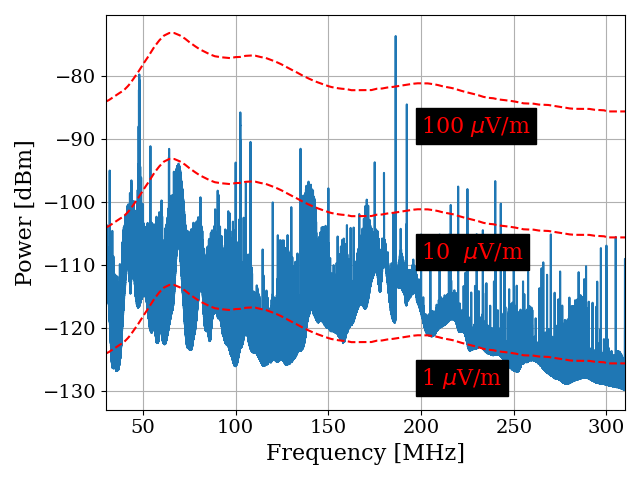

In [228]:
plt.close('all')
# Plotting the original data
plt.plot(freqs, 10 * np.log10(data * 1000), label='Power [dBm]')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [dBm]')
plt.grid(True)


# Reference lines in dBm
field_strength_values = [1e-4,1e-5,1e-6]

for Vpm in field_strength_values:
    dBm = V_per_m_to_dBm(Vpm)
    plt.plot(freqs, dBm, 'r--')

#plt.text(275, -73.5 , f'1 mV/m', fontsize=16, color='r', verticalalignment='bottom', backgroundcolor='black')
plt.text(200, -90 , r'100 $\mu$V/m', fontsize=16, color='r', verticalalignment='bottom', backgroundcolor='black')
plt.text(200, -110 , r'10  $\mu$V/m', fontsize=16, color='r', verticalalignment='bottom', backgroundcolor='black')
plt.text(200, -130 , r'1 $\mu$V/m', fontsize=16, color='r', verticalalignment='bottom', backgroundcolor='black')


plt.tight_layout()
plt.xlim(30,310)
plt.show()